In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Reading the image

In [32]:
im = cv2.imread('elephant.jpg') # Reads an image into BGR format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)

In [54]:
original_shape = im.shape
print(original_shape)

(330, 500, 3)


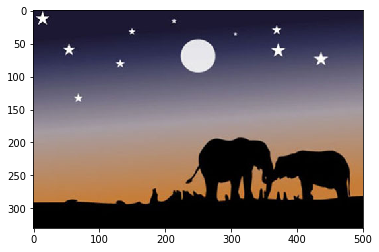

In [49]:
plt.imshow(im) # as RGB format
plt.show()

In [50]:
# Flatten each channel of the image
all_pixels = im.reshape((-1,3))

In [51]:
all_pixels.shape

(165000, 3)

## Extracting the dominant colors

In [60]:
dominant_colors = 5
kmeans = KMeans(n_clusters=dominant_colors)
kmeans.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [61]:
centers = kmeans.cluster_centers_
print(centers)

[[   1.49597475    0.83632573    1.15406   ]
 [ 166.13551653  151.55277832  152.44252592]
 [  97.46305179   94.11765728  117.92314911]
 [ 188.32933141  133.2209401    85.75593925]
 [  37.93273001   35.19947366   64.38895752]]


In [62]:
centers = np.array(centers,dtype='uint8')

In [63]:
print(centers)

[[  1   0   1]
 [166 151 152]
 [ 97  94 117]
 [188 133  85]
 [ 37  35  64]]


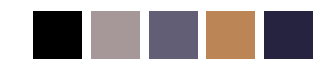

In [65]:
i = 1

plt.figure(0, figsize=(dominant_colors,2))

colors = []

for each_col in centers:
    plt.subplot(1,dominant_colors,i)
    plt.axis("off")
    i += 1
    
    colors.append(each_col)
    
    # Color Swatch
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    
    plt.imshow(a)
    
plt.show()

## Segmenting the image

In [66]:
new_img = np.zeros((original_shape[0]*original_shape[1],3),dtype='uint8')
print(new_img.shape)

(165000, 3)


In [67]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[kmeans.labels_[ix]]
    
new_img = new_img.reshape(original_shape)

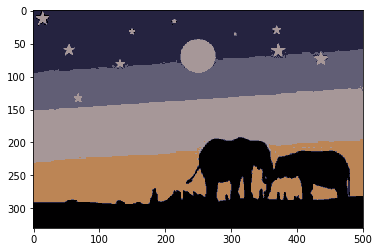

In [68]:
plt.imshow(new_img)
plt.show()